In [1]:
import os
import pandas as pd

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%load_ext autoreload
%autoreload 2

pd.set_option("display.max_column", 100)
pd.set_option("display.max_row", 100)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:

DEFAULT_DATA_SOURCE = "../pipeline/loc_data_postprocessing/tmp_output/gps_full_2023-04-13.csv"

# Test codes
df = pd.read_csv(DEFAULT_DATA_SOURCE)

df

,Unnamed: 0,level_0,index,n,long_mean,lati_mean,long_std,lati_std,path_sum
0,0,2517415.0,40697__2022-04-18,53,127.059642,37.646913,0.005205,0.006067,6596.721228
1,1,2517416.0,36555__2022-03-20,53,128.622606,35.288191,0.014297,0.040873,73150.397393
2,2,2517417.0,31414__2022-11-09,53,129.142442,35.163835,0.000154,0.000061,138.259354
3,3,2517418.0,52449__2022-09-11,53,127.250159,36.475299,0.000130,0.000221,415.511325
4,4,2517419.0,33946__2022-05-19,53,128.555867,35.906675,0.016592,0.034915,43133.826375
...,...,...,...,...,...,...,...,...,...
3543458,3543458,2517410.0,60821__2022-04-20,53,127.118942,37.455423,0.078462,0.026536,58561.443785
3543459,3543459,2517411.0,58056__2022-10-14,53,127.067888,35.860523,0.017769,0.015399,17585.133360
3543460,3543460,2517412.0,60309__2022-10-17,53,126.890745,37.574115,0.000023,0.000064,230.489704
3543461,3543461,2517413.0,25465__2022-06-29,53,127.406838,36.329700,0.012164,0.004389,8555.025350


In [4]:
from math import radians, cos, sin, sqrt, asin
from math import pi, sin, cos, sqrt, atan2


def distance_with_angle(lat1, lon1, lat2, lon2):
    """generally used geo measurement function"""
    R = 6378.137  # Radius of earth in KM
    dLat = lat2 * pi / 180 - lat1 * pi / 180
    dLon = lon2 * pi / 180 - lon1 * pi / 180
    a = sin(dLat / 2) * sin(dLat / 2) + cos(lat1 * pi / 180) * cos(lat2 * pi / 180) * sin(dLon / 2) * sin(dLon / 2)
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    d = R * c
    return d * 1000  # Km -> meters



# Define the coordinates of the two points in degrees
lat1, lon1 = 37.0, -127.3
lat2, lon2 = 37.0, -127.4

distance_ratio_lon = distance_with_angle(lat1, lon1, lat2, lon2) * 10
# Print the distance
print(f"lon 1 is {distance_ratio_lon:.2f} meters")


# Define the coordinates of the two points in degrees
lat1, lon1 = 37.1, -127.4
lat2, lon2 = 37.0, -127.4

distance_ratio_lat = distance_with_angle(lat1, lon1, lat2, lon2) * 10
# Print the distance
print(f"lat 1 is {distance_ratio_lat:.2f} meters")



lon 1 is 88903.69 meters
lat 1 is 111319.49 meters


In [5]:
import numpy as np

# one standard devidation for 2d points. 
df['lati_std_in_meter'] = distance_ratio_lat * df['lati_std']
df['long_std_in_meter'] = distance_ratio_lon * df['long_std']
df['std_in_meter'] = np.sqrt((df['lati_std_in_meter'] ** 2 + df['long_std_in_meter'] ** 2)/2)

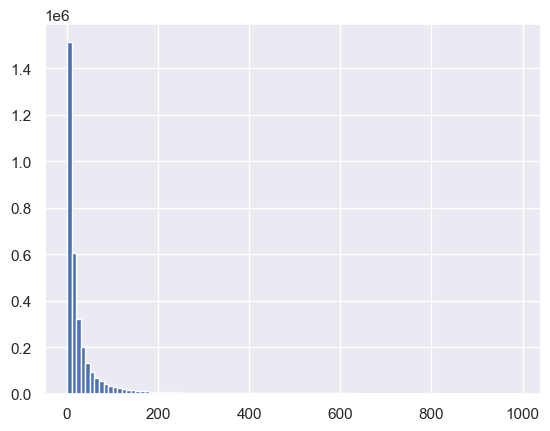

In [6]:
df['n'].hist(bins=range(0, 1000, 10))
plt.show()

In [7]:
df[df['n'] > 1000]

,Unnamed: 0,level_0,index,n,long_mean,lati_mean,long_std,lati_std,path_sum,lati_std_in_meter,long_std_in_meter,std_in_meter
30814,30814,2548229.0,32312__2022-03-23,1008,127.004641,37.576281,0.000022,0.000025,247.302234,2.751180,1.945020,2.382446
30815,30815,2548230.0,47311__2022-09-02,1008,126.851739,37.275420,0.001755,0.011856,8121.617441,1319.758431,156.019851,939.708601
30816,30816,2548231.0,39448__2022-12-01,1008,127.087625,37.500492,0.149382,0.121239,133275.391980,13496.274599,13280.585018,13388.864150
30817,30817,2548232.0,30508__2022-03-24,1008,126.547654,37.490212,0.000052,0.000035,4220.408168,3.927023,4.657774,4.307921
30818,30818,2548233.0,45469__2022-06-18,1008,128.988581,35.420464,0.219678,0.224089,167582.038892,24945.455054,19530.169828,22402.045234
...,...,...,...,...,...,...,...,...,...,...,...,...
3504473,3504473,2478425.0,36130__2022-03-27,14590,126.848625,37.443190,0.072434,0.060883,186020.148224,6777.469185,6439.691427,6610.738016
3504474,3504474,2478426.0,47929__2022-04-11,15102,126.743002,37.507721,0.007680,0.014456,45313.366743,1609.198779,682.743148,1236.053987
3504475,3504475,2478427.0,47972__2022-07-30,16892,126.915268,37.553131,0.000026,0.000002,303.710584,0.204384,2.344998,1.664450
3504476,3504476,2478428.0,34773__2022-06-24,19964,126.916702,37.556682,0.031552,0.030663,54478.808401,3413.341050,2805.094833,3124.056189


In [8]:
df[df['index'] == '30791__2022-12-24'].to_dict()

{'Unnamed: 0': {3195869: 3195869},
 'level_0': {3195869: 2169821.0},
 'index': {3195869: '30791__2022-12-24'},
 'n': {3195869: 73407},
 'long_mean': {3195869: 127.967610869368},
 'lati_mean': {3195869: 35.3937421939593},
 'long_std': {3195869: 0.161735168479704},
 'lati_std': {3195869: 0.331871467014613},
 'path_sum': {3195869: 300006.921346315},
 'lati_std_in_meter': {3195869: 36943.76271688346},
 'long_std_in_meter': {3195869: 14378.853963309766},
 'std_in_meter': {3195869: 28032.06240164624}}

In [9]:
1.617352e-01 * distance_ratio_lon, 3.318715e-01 * distance_ratio_lat

(14378.856765580524, 36943.76638879994)

In [11]:
#검산
sqrt(((1.617352e-01 * distance_ratio_lon) **2 + (3.318715e-01 * distance_ratio_lat) **2 )/2)

28032.06553997854

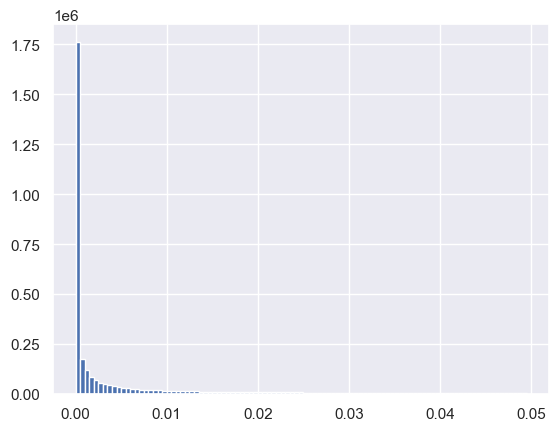

In [12]:
df['long_std'].hist(bins=[float(x) / 2000 for x in range(0, 100)])
plt.show()

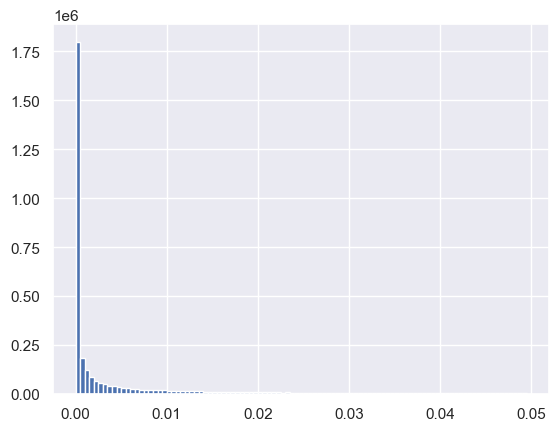

In [13]:
df['lati_std'].hist(bins=[float(x) / 2000 for x in range(0, 100)])
plt.show()

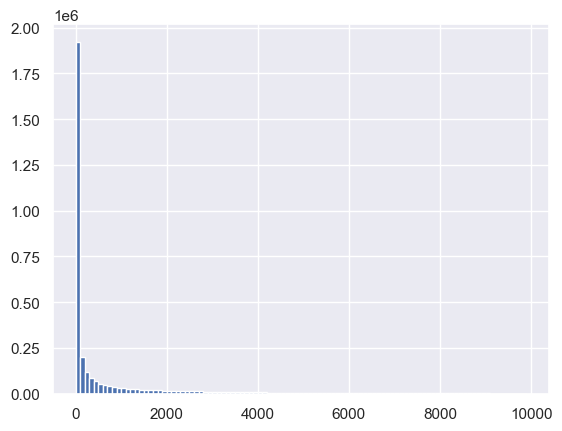

In [14]:
df['std_in_meter'].hist(bins=[float(x) for x in range(0, 10000, 100)])
plt.show()

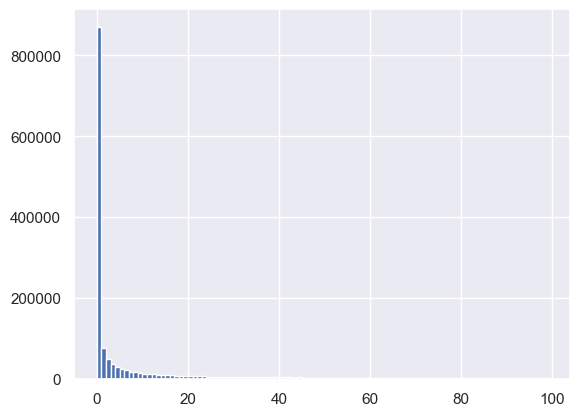

In [15]:
df['path_sum'].hist(bins=[float(x) for x in range(0, 100)])
plt.show()

In [20]:
df['path_sum'].quantile(0.99)

247211.73662446922

In [17]:
df['path_sum'].describe()

df[df['path_sum'] < df['path_sum'].mean() + 2 * df['path_sum'].std() ]['path_sum'].describe()

count    3.542694e+06
mean     1.736051e+04
std      6.812597e+04
min      0.000000e+00
25%      1.157849e+00
50%      4.280846e+02
75%      1.070519e+04
max      3.716128e+06
Name: path_sum, dtype: float64

## 너무 극단적인 값이 많으니 로그를 씌워보자

- lati, long 등은 0이 너무 많아서 (전체의 약 xx%) normalize할때 0인 값들은 null로 가정하고. masking 후에 normalize해야겠다. 
- log 이후에도 극단적인 값들이 종종 보임. 2표준편차 이상은 clip하고 다시 mean, std구해서 normalize해야 할듯

<AxesSubplot:>

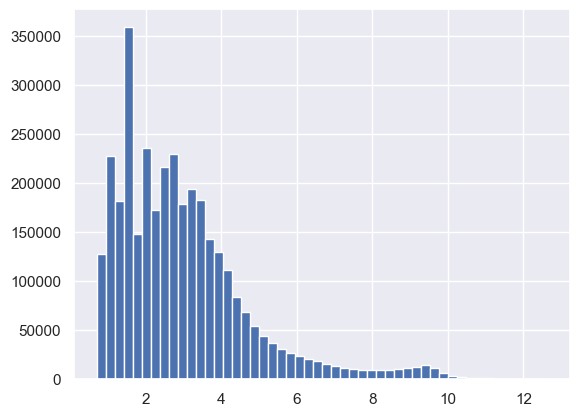

In [121]:
import numpy as np

df['n_log'] = np.log(df['n'] + 1)
df['n_log'].hist(bins=50)

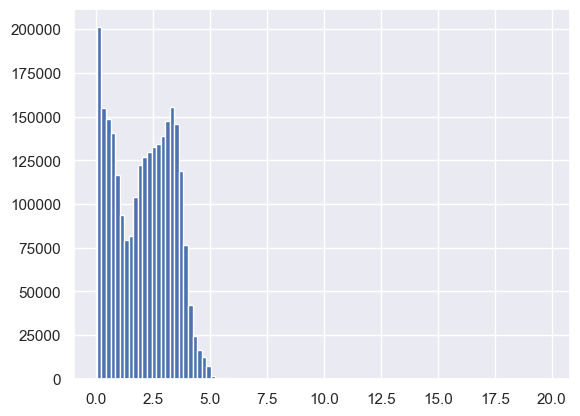

In [122]:
import numpy as np
import math

df['std_in_meter_log'] = df['std_in_meter'].apply(lambda x: math.log(x+1, 10))
df['std_in_meter_log'].hist(bins=[float(x)/50 for x in range(1, 1000, 10)])
plt.show()

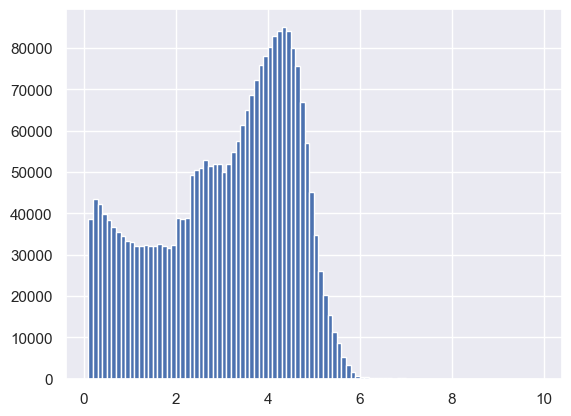

In [123]:
import numpy as np
import math

df['path_sum_log'] = df['path_sum'].apply(lambda x: math.log(x+1, 10))
df['path_sum_log'].hist(bins=[float(x)/10 for x in range(1, 100)])
plt.show()

In [124]:
df

,Unnamed: 0,level_0,index,n,long_mean,lati_mean,long_std,lati_std,path_sum,lati_std_in_meter,long_std_in_meter,std_in_meter,n_log,long_std_log,lati_std_log,path_sum_log,std_in_meter_norm,lati_std_norm,long_std_norm,std_in_meter_log
0,0,2291532.0,67226__2022-10-01,5,129.339522,35.541812,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.791759,0.000000e+00,0.0,0.0,-5.199338,-5.199338,-5.199338,0.000000e+00
1,1,2291533.0,59221__2022-08-03,5,129.401425,36.083921,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.791759,0.000000e+00,0.0,0.0,-5.199338,-5.199338,-5.199338,0.000000e+00
2,2,2291534.0,60584__2023-01-03,5,126.777195,37.683084,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.791759,0.000000e+00,0.0,0.0,-5.199338,-5.199338,-5.199338,0.000000e+00
3,3,2291535.0,43525__2022-08-10,5,128.818057,35.178984,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.791759,0.000000e+00,0.0,0.0,-5.199338,-5.199338,-5.199338,0.000000e+00
4,4,2291536.0,33138__2022-06-24,5,127.390449,36.346776,1.588822e-14,0.0,0.0,0.0,1.412521e-09,9.988034e-10,1.791759,6.943158e-15,0.0,0.0,-5.199338,-5.199338,-5.199338,4.337748e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394798,3394798,2291527.0,57528__2022-07-18,5,127.146027,37.370074,1.588822e-14,0.0,0.0,0.0,1.412521e-09,9.988034e-10,1.791759,6.943158e-15,0.0,0.0,-5.199338,-5.199338,-5.199338,4.337748e-10
3394799,3394799,2291528.0,58188__2022-09-12,5,127.253766,36.505706,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.791759,0.000000e+00,0.0,0.0,-5.199338,-5.199338,-5.199338,0.000000e+00
3394800,3394800,2291529.0,36936__2022-06-30,5,127.337106,36.367970,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.791759,0.000000e+00,0.0,0.0,-5.199338,-5.199338,-5.199338,0.000000e+00
3394801,3394801,2291530.0,49358__2022-07-07,5,127.950750,37.323099,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.791759,0.000000e+00,0.0,0.0,-5.199338,-5.199338,-5.199338,0.000000e+00


# 너무 Normalize과정이 복잡... 일단 시간없으니까 quantile이용한 normalize로 통일하고 0만 null 로 처리

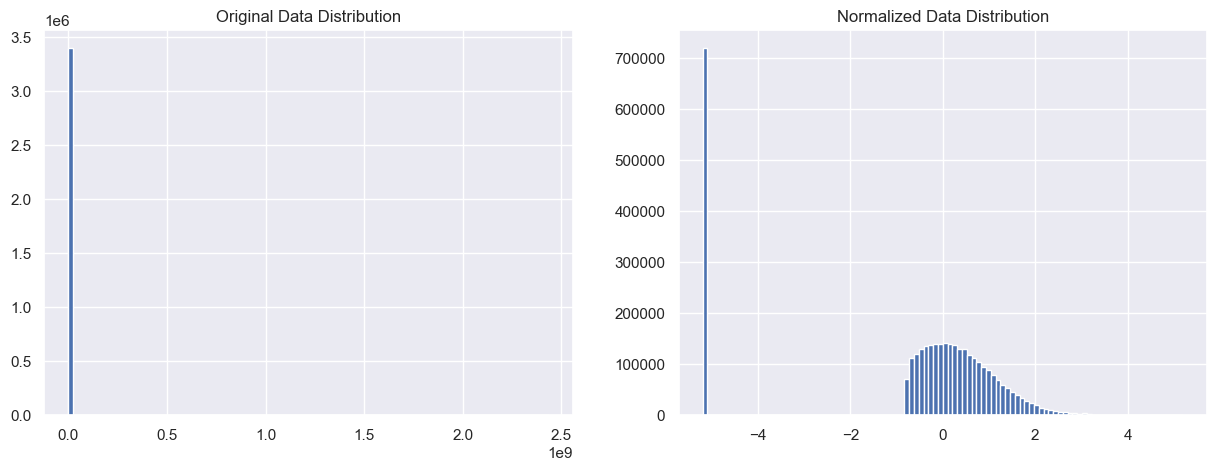

array([[-5.19933758],
       [-5.19933758],
       [-5.19933758],
       ...,
       [-5.19933758],
       [-5.19933758],
       [-5.19933758]])

In [125]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer

def normalize(sr, display=True):
    # create long-tailed distribution data
    data = sr.values

    # normalize the data using Quantile Transformation
    qt = QuantileTransformer(output_distribution='normal')
    data_normalized = qt.fit_transform(data.reshape(-1, 1))
    
    if display:
        # plot the original and normalized distributions
        import matplotlib.pyplot as plt
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
        axs[0].hist(data, bins=100)
        axs[0].set_title('Original Data Distribution')
        axs[1].hist(data_normalized, bins=100)
        axs[1].set_title('Normalized Data Distribution')
        plt.show()
    
    return data_normalized
    
normalize(df['path_sum'])

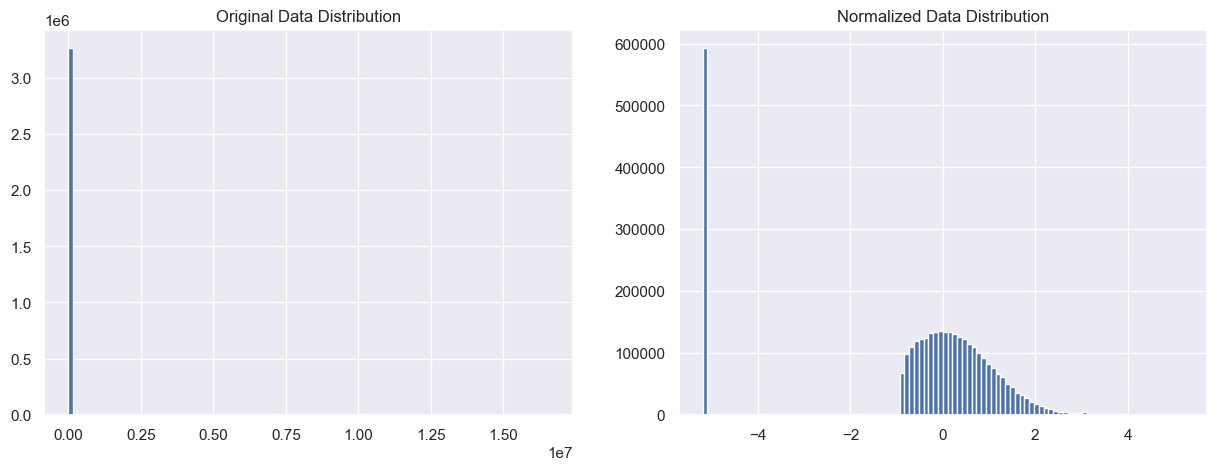

array([[-5.19933758],
       [-5.19933758],
       [-5.19933758],
       ...,
       [-5.19933758],
       [-5.19933758],
       [-5.19933758]])

In [126]:
normalize(df['std_in_meter'])

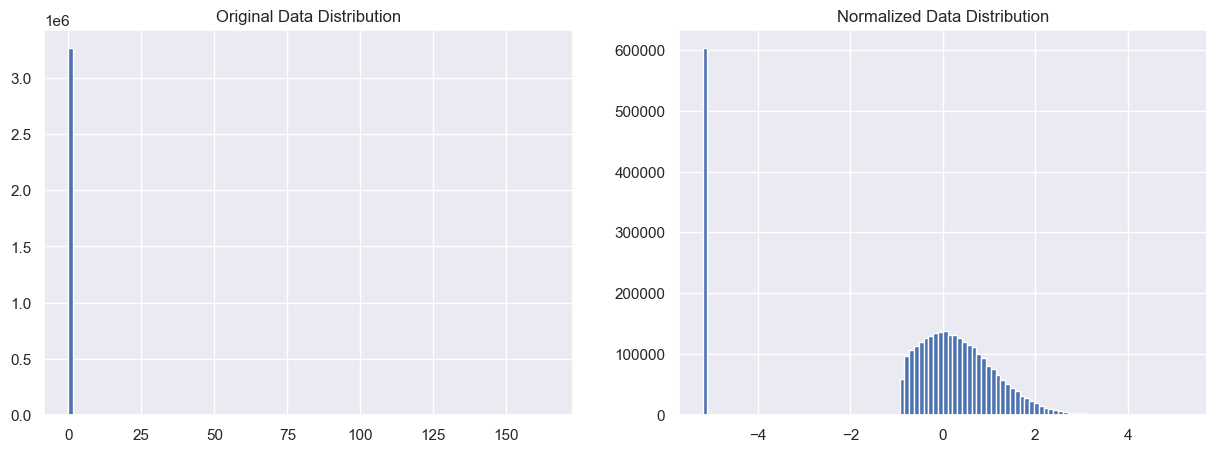

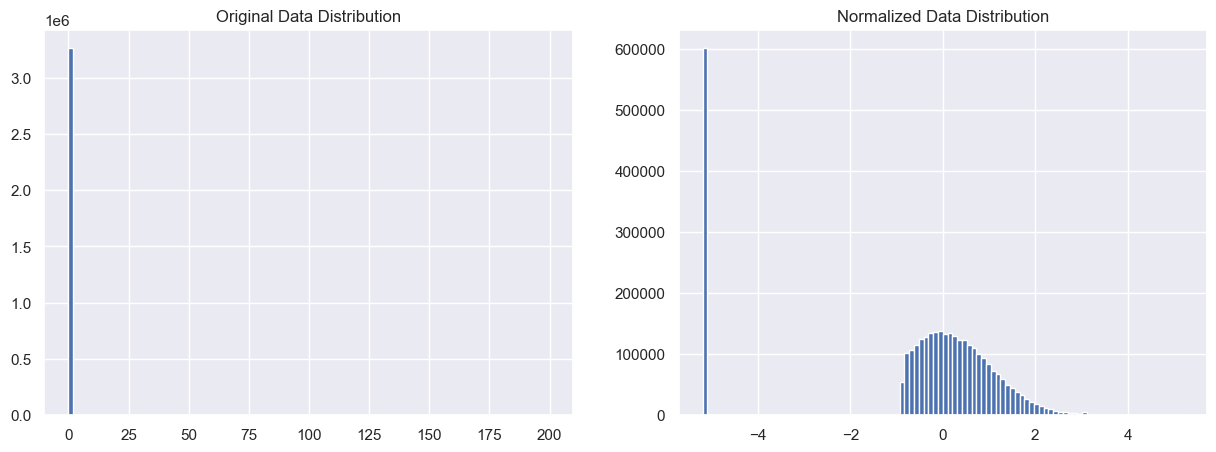

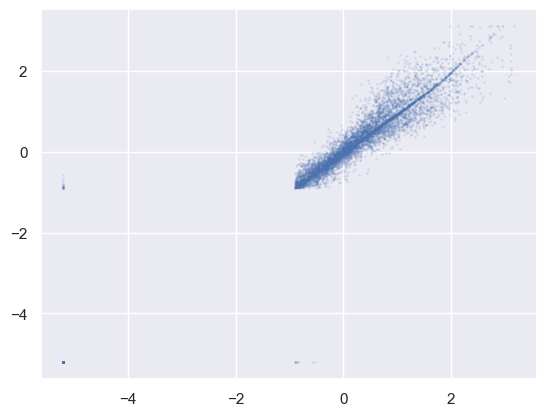

In [127]:
df['lati_std_norm'] = normalize(df['lati_std'])
df['long_std_norm'] = normalize(df['long_std'])
df_sample = df.sample(10000)
plt.scatter(df_sample['lati_std_norm'], df_sample['long_std_norm'], s=1, alpha=0.1)
plt.show()

## Check preprocessed data

In [110]:
df_loc_pp = pd.read_csv("../pipeline/loc_data_postprocessing/tmp_output/gps_full_2023-03-22_norm.csv")

In [111]:
df_sample = df_loc_pp.sample(20, random_state=1212)
df_sample

,index,n,long_std,lati_std,path_sum,n_norm,long_std_norm,lati_std_norm,path_sum_norm,n_mask,long_std_mask,lati_std_mask,path_sum_mask
3156084,31134__2022-06-14,37,0.009006,0.015294,12355.165205,0.665852,0.722047,0.938069,0.721152,0,0,0,0
2419236,63649__2022-09-29,14,0.000258,0.000200,259.902283,0.064027,-0.061807,-0.088563,-0.068487,0,0,0,0
1330668,57070__2022-11-22,6,0.000010,0.000030,6.655434,-0.448692,-0.621816,-0.388357,-0.503109,0,0,0,0
3262828,28031__2022-04-25,734,0.000041,0.000032,2073.067645,1.691267,-0.360965,-0.372221,0.271991,0,0,0,0
2951395,26924__2022-12-17,4,0.000000,0.000000,0.000000,-0.809168,-5.199338,-5.199338,-5.199338,0,1,1,1
1350654,68311__2022-12-23,7,0.001329,0.000921,1068.807257,-0.352151,0.222289,0.159821,0.166301,0,0,0,0
41541,62662__2022-10-12,1,NaN,NaN,0.000000,-5.199338,NaN,NaN,-5.199338,0,1,1,1
2106080,65322__2022-07-29,31,0.000017,0.000023,73.463273,0.556927,-0.535112,-0.437991,-0.238326,0,0,0,0
2390237,46738__2022-04-06,12,0.000003,0.000002,0.663673,-0.032625,-0.792620,-0.789203,-0.723617,0,0,0,0
2255837,62786__2022-09-05,6,0.003567,0.008379,2044.297813,-0.448692,0.454130,0.727450,0.269404,0,0,0,0


In [112]:
df[df['index'] == '62730__2022-05-02']

,Unnamed: 0,level_0,index,n,long_mean,lati_mean,long_std,lati_std,path_sum,lati_std_in_meter,long_std_in_meter,std_in_meter,n_log,long_std_log,lati_std_log,path_sum_log,std_in_meter_norm,lati_std_norm,long_std_norm
3389855,3389855,2286584.0,62730__2022-05-02,4,127.08926,37.20809,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,-5.199338,-5.199338,-5.199338


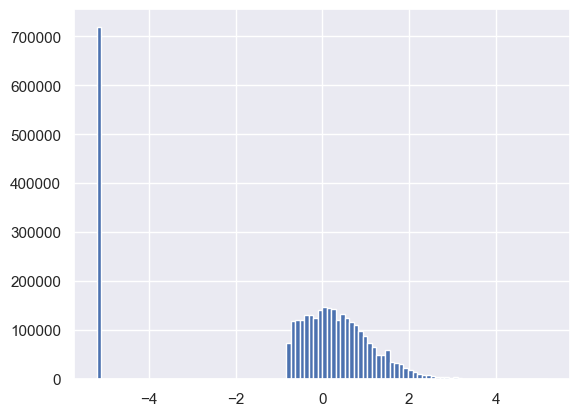

In [113]:
df_loc_pp['path_sum_norm'].hist(bins=100)
plt.show()

# Check train data distribution

In [5]:
df_all = pd.read_csv('../pipeline/output/shine_v3_3_kt/df_all_added_owid_loc.csv')
df_all.sample(10)

,patient_id,selfcheck_date,cough,fever,sore_throat,shortness_of_breath,head_ache,runny_nose,muscle_pain,chills,loss_of_taste,loss_of_smell,sputum,chest_pain,indication_other,indication_abroad,indication_contact,global_confirmed_ratio,confirmed_ratio,sigungu_confirmed_ratio,mask,gender,age_ratio,weekday,pcr_result,split,iso_code,date,total_cases_per_million_norm,total_cases_per_million_mask,new_cases_per_million_norm,new_cases_per_million_mask,new_cases_smoothed_per_million_norm,new_cases_smoothed_per_million_mask,total_deaths_per_million_norm,total_deaths_per_million_mask,new_deaths_per_million_norm,new_deaths_per_million_mask,new_deaths_smoothed_per_million_norm,new_deaths_smoothed_per_million_mask,icu_patients_per_million_norm,icu_patients_per_million_mask,hosp_patients_per_million_norm,hosp_patients_per_million_mask,weekly_icu_admissions_per_million_norm,weekly_icu_admissions_per_million_mask,weekly_hosp_admissions_per_million_norm,weekly_hosp_admissions_per_million_mask,total_tests_per_thousand_norm,total_tests_per_thousand_mask,...,loc_std_mask-3,path_sum_mask-3,selfcheck_date_-4,loc_index-4,index-4,n-4,loc_std-4,path_sum-4,n_norm-4,loc_std_norm-4,path_sum_norm-4,n_mask-4,loc_std_mask-4,path_sum_mask-4,selfcheck_date_-5,loc_index-5,index-5,n-5,loc_std-5,path_sum-5,n_norm-5,loc_std_norm-5,path_sum_norm-5,n_mask-5,loc_std_mask-5,path_sum_mask-5,selfcheck_date_-6,loc_index-6,index-6,n-6,loc_std-6,path_sum-6,n_norm-6,loc_std_norm-6,path_sum_norm-6,n_mask-6,loc_std_mask-6,path_sum_mask-6,selfcheck_date_-7,loc_index-7,index-7,n-7,loc_std-7,path_sum-7,n_norm-7,loc_std_norm-7,path_sum_norm-7,n_mask-7,loc_std_mask-7,path_sum_mask-7
8287,40117,2022-10-10,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.111095,0.024908,0.235558,1,1.0,0.59,0,0,TRAIN,KOR,2022-10-10,0.663845,0.0,0.000757,0.0,0.010957,0.0,0.085909,0.0,0.000736,0.0,0.003505,0.0,0.033220,0.0,0.014725,0.0,0.000000,1.0,0.017818,0.0,0.000000,1.0,...,0.0,0.0,2022-10-06,40117__2022-10-06,40117__2022-10-06,41.0,2.224154e+03,51026.794491,0.686350,1.020772,1.365080,0.0,0.0,0.0,2022-10-05,40117__2022-10-05,40117__2022-10-05,58.0,2140.911610,55070.664907,0.873515,1.003335,1.409262,0.0,0.0,0.0,2022-10-04,40117__2022-10-04,40117__2022-10-04,81.0,1864.422639,67043.225415,1.035790,0.946791,1.524063,0.0,0.0,0.0,2022-10-03,40117__2022-10-03,40117__2022-10-03,32.0,314.410227,5834.755592,0.548158,0.423041,0.498959,0.0,0.0,0.0
8316,26863,2022-10-15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.053410,0.034554,0.000000,1,1.0,0.68,5,0,TRAIN,KOR,2022-10-15,0.667014,0.0,0.001919,0.0,0.010798,0.0,0.086239,0.0,0.000798,0.0,0.003007,0.0,0.026169,0.0,0.013196,0.0,0.000000,1.0,0.016181,0.0,0.000000,1.0,...,0.0,1.0,2022-10-11,26863__2022-10-11,26863__2022-10-11,186.0,8.957682e-10,0.000000,1.344084,-5.199338,-5.199338,0.0,0.0,1.0,2022-10-10,26863__2022-10-10,26863__2022-10-10,334.0,3.178522,141.976502,1.502094,-0.406201,-0.164009,0.0,0.0,0.0,2022-10-09,26863__2022-10-09,26863__2022-10-09,322.0,1.435248,14.368102,1.493283,-0.559311,-0.411096,0.0,0.0,0.0,2022-10-08,26863__2022-10-08,26863__2022-10-08,359.0,2.901002,89.027824,1.521525,-0.424888,-0.221141,0.0,0.0,0.0
12077,62466,2022-12-04,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.062976,0.037276,0.279240,1,0.0,0.15,6,1,VALIDATE,KOR,2022-12-04,0.725721,0.0,0.003926,0.0,0.027434,0.0,0.091989,0.0,0.001918,0.0,0.006681,0.0,0.049138,0.0,0.000000,1.0,0.000000,1.0,0.034464,0.0,0.000000,1.0,...,0.0,0.0,2022-11-30,62466__2022-11-30,62466__2022-11-30,33.0,3.843083e+02,11757.160678,0.565738,0.471424,0.708959,0.0,0.0,0.0,2022-11-29,62466__2022-11-29,62466__2022-11-29,35.0,165.887536,8205.228223,0.596935,0.276461,0.596630,0.0,0.0,0.0,2022-11-28,62466__2022-11-28,62466__2022-11-28,15.0,121.862647,1921.899978,0.092972,0.208171,0.252938,0.0,0.0,0.0,2022-11-27,62466__2022-11-27,62466__2022-11-27,40.0,48500.995177,227472.407961,0.672129,2.546532,2.261441,0.0,0.0,0.0
11439,54670,2022-05-12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.157046,0.070655,0.170687,1,1.0,0.38,1,0,VALIDATE,KOR,2022-05-12,0.470240,0.0,0.003024,0.0,0.0

In [7]:
df_all.groupby("path_sum_mask-1").size()

path_sum_mask-1
0.0     4526
1.0    10850
dtype: int64

In [11]:
df_all[['path_sum_norm-1', 'path_sum_mask-1']].sample(10)

,path_sum_norm-1,path_sum_mask-1
6856,0.000000,1.0
2360,0.000000,1.0
15210,1.696816,0.0
8422,-5.199338,1.0
5559,0.802660,0.0
8096,0.221414,0.0
2277,0.000000,1.0
6826,1.028050,0.0
12812,0.000000,1.0
10724,-5.199338,1.0


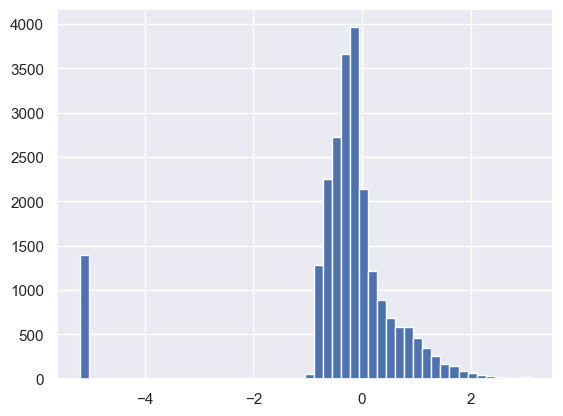

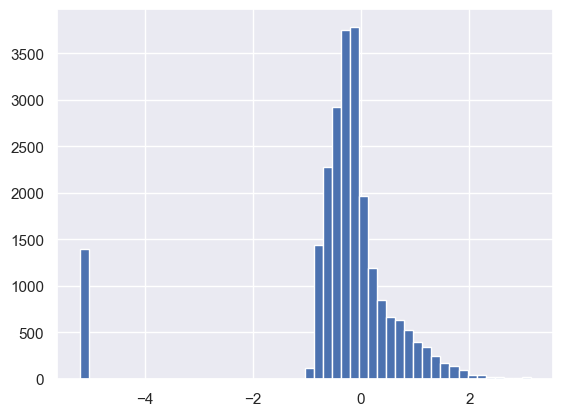

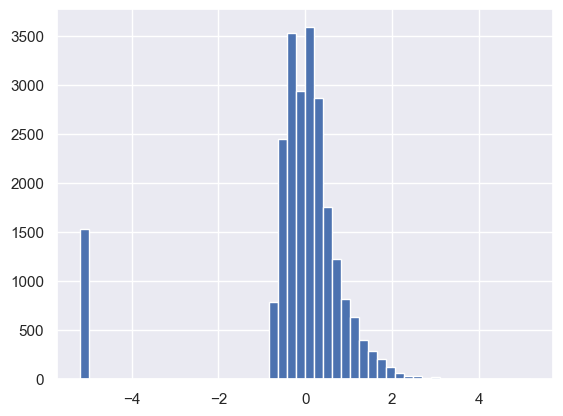

In [115]:
df_all['long_std_norm'].hist(bins=50)
plt.show()

df_all['lati_std_norm'].hist(bins=50)
plt.show()

df_all['path_sum_norm'].hist(bins=50)
plt.show()